In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms.functional as TF

In [2]:
train_folder = "data/train/"
test_folder = "data/test/"
valid_folder = "data/valid/"
calib_folder = "data/calib/"

type_labels = [
    "sedan",
    "suv",
    "van",
    "hatchback",
    "mpv",
    "pickup",
    "bus",
    "truck",
    "estate",
    "sportscar",
    "RV",
]

color_labels = [
    "yellow",
    "orange",
    "green",
    "gray",
    "red",
    "blue",
    "white",
    "golden",
    "brown",
    "black",
    "purple",
    "pink",
]

In [3]:
def get_df(folder):
    img_path = os.path.join(folder, "images")
    labels_path = os.path.join(folder, "labels")
    data = []
    for file in os.listdir(img_path):
        label_file = os.path.join(labels_path, file.replace(".jpg", ".txt"))
        if os.path.exists(label_file):
            with open(label_file, "r") as f:
                content = f.read().strip()
                if content:
                    color_class, type_class = content.split()
                    data.append(
                        {
                            "Filename": file,
                            "Color Class": color_labels[int(color_class)],
                            "Type Class": type_labels[int(type_class)],
                        }
                    )

    return pd.DataFrame(data)

In [4]:
df_train = get_df(train_folder)
df_test = get_df(test_folder)
df_val = get_df(valid_folder)
df_cal = get_df(calib_folder)
dfs = {"Train": df_train, "Test": df_test, "Valid": df_val, "Calib": df_cal}

In [5]:
color_counts = {}
type_counts = {}

for name, df in dfs.items():
    color_counts[name] = (
        df["Color Class"].value_counts().reindex(color_labels, fill_value=0)
    )
    type_counts[name] = (
        df["Type Class"].value_counts().reindex(type_labels, fill_value=0)
    )

color_counts_df = pd.DataFrame(color_counts)
type_counts_df = pd.DataFrame(type_counts)
color_counts_df["Total"] = color_counts_df.sum(axis=1)
type_counts_df["Total"] = type_counts_df.sum(axis=1)

print("Number of images per color in each dataset:")
display(color_counts_df)

print("\nNumber of images per type in each dataset:")
display(type_counts_df)

Number of images per color in each dataset:


,Train,Test,Valid,Calib,Total
Color Class,,,,,
yellow,1515,386,282,386,2569
orange,1608,398,287,379,2672
green,1632,408,278,383,2701
gray,1602,379,274,414,2669
red,1584,448,254,449,2735
blue,1597,388,250,402,2637
white,1600,398,268,402,2668
golden,1614,373,275,410,2672
brown,1638,394,271,415,2718



Number of images per type in each dataset:


,Train,Test,Valid,Calib,Total
Type Class,,,,,
sedan,4358,1100,742,1035,7235
suv,1915,504,326,507,3252
van,891,233,177,214,1515
hatchback,4233,1015,694,1087,7029
mpv,207,57,40,49,353
pickup,539,135,84,129,887
bus,639,178,95,176,1088
truck,1253,306,199,291,2049
estate,462,115,72,112,761


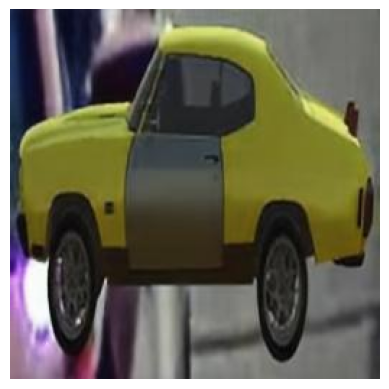

tensor([0.3137, 0.3137, 0.2745])

In [6]:
image = Image.open(
    os.path.join(train_folder, "images", df_train["Filename"].values[0])
).convert("RGB")
plt.imshow(image)
plt.axis("off")
plt.show()
image = TF.to_tensor(image)
image[:, 128, 128]

<Figure size 1200x600 with 0 Axes>

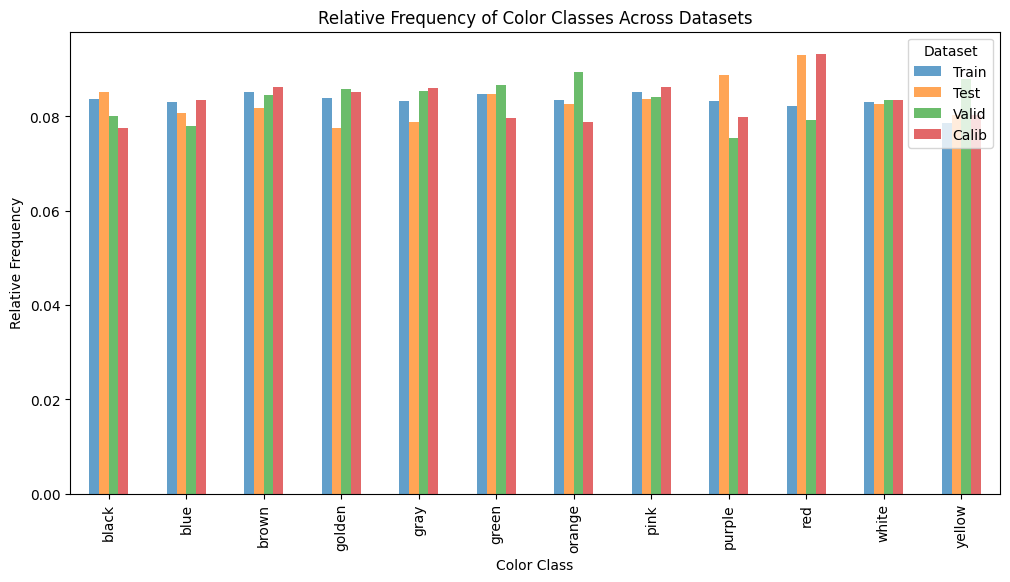

<Figure size 1200x600 with 0 Axes>

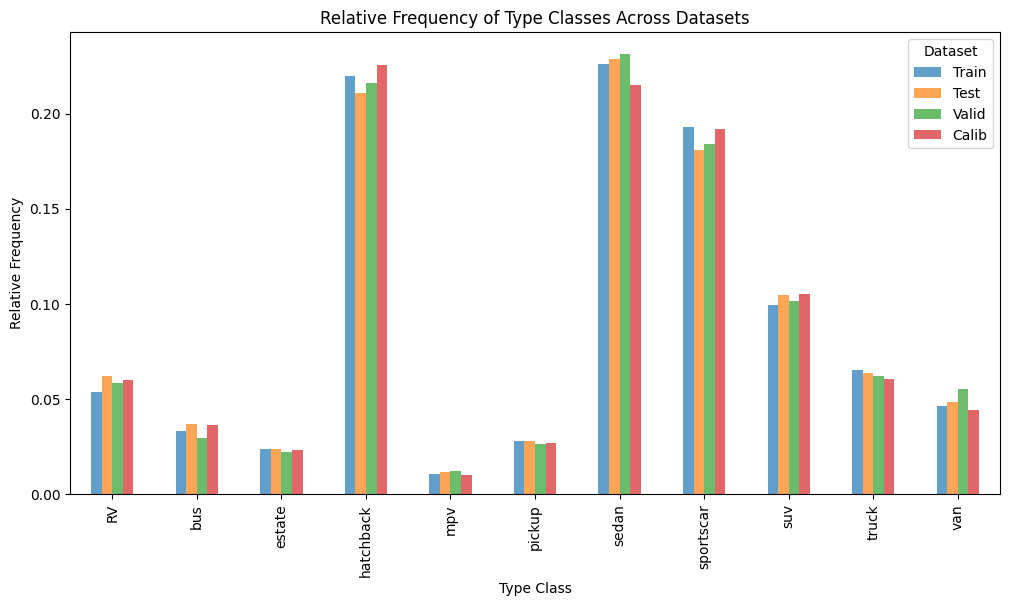

In [7]:
def plot_class_distribution(dfs: dict[str, pd.DataFrame], class_name):
    color_ratios = pd.DataFrame(
        {
            "Train": dfs["Train"][f"{class_name} Class"].value_counts(normalize=True),
            "Test": dfs["Test"][f"{class_name} Class"].value_counts(normalize=True),
            "Valid": dfs["Valid"][f"{class_name} Class"].value_counts(normalize=True),
            "Calib": dfs["Calib"][f"{class_name} Class"].value_counts(normalize=True),
        }
    ).fillna(0)

    plt.figure(figsize=(12, 6))
    color_ratios.plot(kind="bar", figsize=(12, 6), alpha=0.7)
    plt.title(f"Relative Frequency of {class_name} Classes Across Datasets")
    plt.xlabel(f"{class_name} Class")
    plt.ylabel("Relative Frequency")
    plt.legend(title="Dataset")
    plt.show()


plot_class_distribution(dfs, "Color")
plot_class_distribution(dfs, "Type")

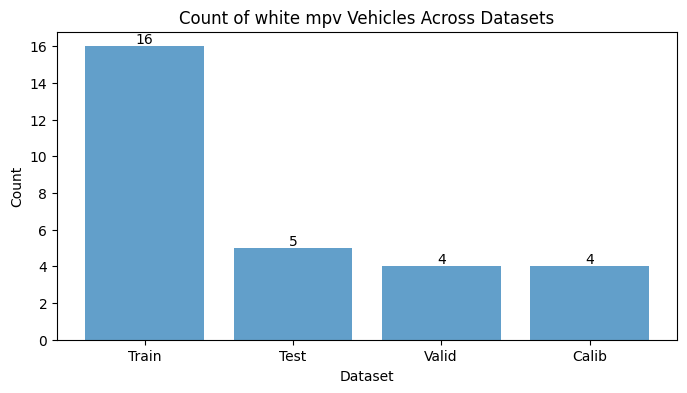

In [8]:
type_class = 4
color_class = 6


def count_vehicle(dfs, type_class, color_class):
    count = {}
    for name, df in dfs.items():
        count[name] = len(
            df[
                (df["Color Class"] == color_labels[color_class])
                & (df["Type Class"] == type_labels[type_class])
            ]
        )
    return count


def plot_vehicle_count(dfs, type_class, color_class):
    count = count_vehicle(dfs, type_class, color_class)
    plt.figure(figsize=(8, 4))
    plt.bar(count.keys(), count.values(), alpha=0.7)
    plt.title(
        f"Count of {color_labels[color_class]} {type_labels[type_class]} Vehicles Across Datasets"
    )
    for i, (_, value) in enumerate(count.items()):
        plt.text(i, value, str(value), ha="center", va="bottom")
    plt.xlabel("Dataset")
    plt.ylabel("Count")
    plt.show()


plot_vehicle_count(dfs, type_class, color_class)